# Final Project  
Work with a Panic Disorder Detection dataset that contains patient demographic information, symptoms, medical history, lifestyle factors, and mental health assessment results. The goal is to analyze the dataset, preprocess the data, resolve class imbalance, extract meaningful features, and evaluate machine learning models for predicting panic disorder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Data Exploration & Understanding

### 1.1. Load the dataset using pandas

In [2]:
panic = pd.read_csv('C:/Users/ther3/Marquette/Spring 2025/COSC 5610 - Data Mining/codes/Final project/panic_disorder_detection.csv')

### 1.2. Printing out basic information of the dataset

In [3]:
panic.head(5)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


In [4]:
panic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            120000 non-null  int64 
 1   Age                       120000 non-null  int64 
 2   Gender                    120000 non-null  object
 3   Family History            120000 non-null  object
 4   Personal History          120000 non-null  object
 5   Current Stressors         120000 non-null  object
 6   Symptoms                  120000 non-null  object
 7   Severity                  120000 non-null  object
 8   Impact on Life            120000 non-null  object
 9   Demographics              120000 non-null  object
 10  Medical History           89776 non-null   object
 11  Psychiatric History       90104 non-null   object
 12  Substance Use             79922 non-null   object
 13  Coping Mechanisms         120000 non-null  object
 14  Soci

In [5]:
panic.describe()

,Participant ID,Age,Panic Disorder Diagnosis
count,120000.000000,120000.000000,120000.00000
mean,50005.474075,43.060983,0.04285
std,28859.937508,28.226396,0.20252
min,1.000000,-10.000000,0.00000
25%,24997.750000,29.000000,0.00000
50%,49999.500000,42.000000,0.00000
75%,74980.000000,54.000000,0.00000
max,100000.000000,500.000000,1.00000


### 1.3. Check for missing values and duplicate entries 

In [6]:
from collections import defaultdict

target_column = 'Panic Disorder Diagnosis'

panic_null = panic.isnull()

null_counts = panic.isnull().sum()

#defining a dict to store empty values
panic_null_dict = defaultdict(list)

for index in range(len(panic_null.columns)):

    #Skipping the target column
    if(index == target_column):
        continue

    null_index = panic_null.loc[panic_null[panic_null.columns[index]]==True]
    
    if(len(null_index.index) == 0):
        continue
    else:
        #Adding these empty value indexes to a dictionary
        panic_null_dict[panic_null.columns[index]] = null_index.index
        print(f'The {null_index.columns[index]} column has {len(null_index.index)} empty values\n')



The Medical History column has 30224 empty values

The Psychiatric History column has 29896 empty values

The Substance Use column has 40078 empty values



In [7]:
panic_dupes = panic.duplicated()

target_column = 'Panic Disorder Diagnosis'
dupe_mask = panic.duplicated(subset=panic.columns.difference([target_column]))
num_dupes = dupe_mask.sum()

if(dupe_mask.any()):
    print(f'Yes, the dataset has total number of {num_dupes} duplicate values')
else:
    print('No dupes found')


Yes, the dataset has total number of 19601 duplicate values


### (1.4) Perform an initial visualization of categorical variables (Gender, Symptoms, Social Support, etc.). Use plotting library to use (e.g., matplotlib, seaborn)


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

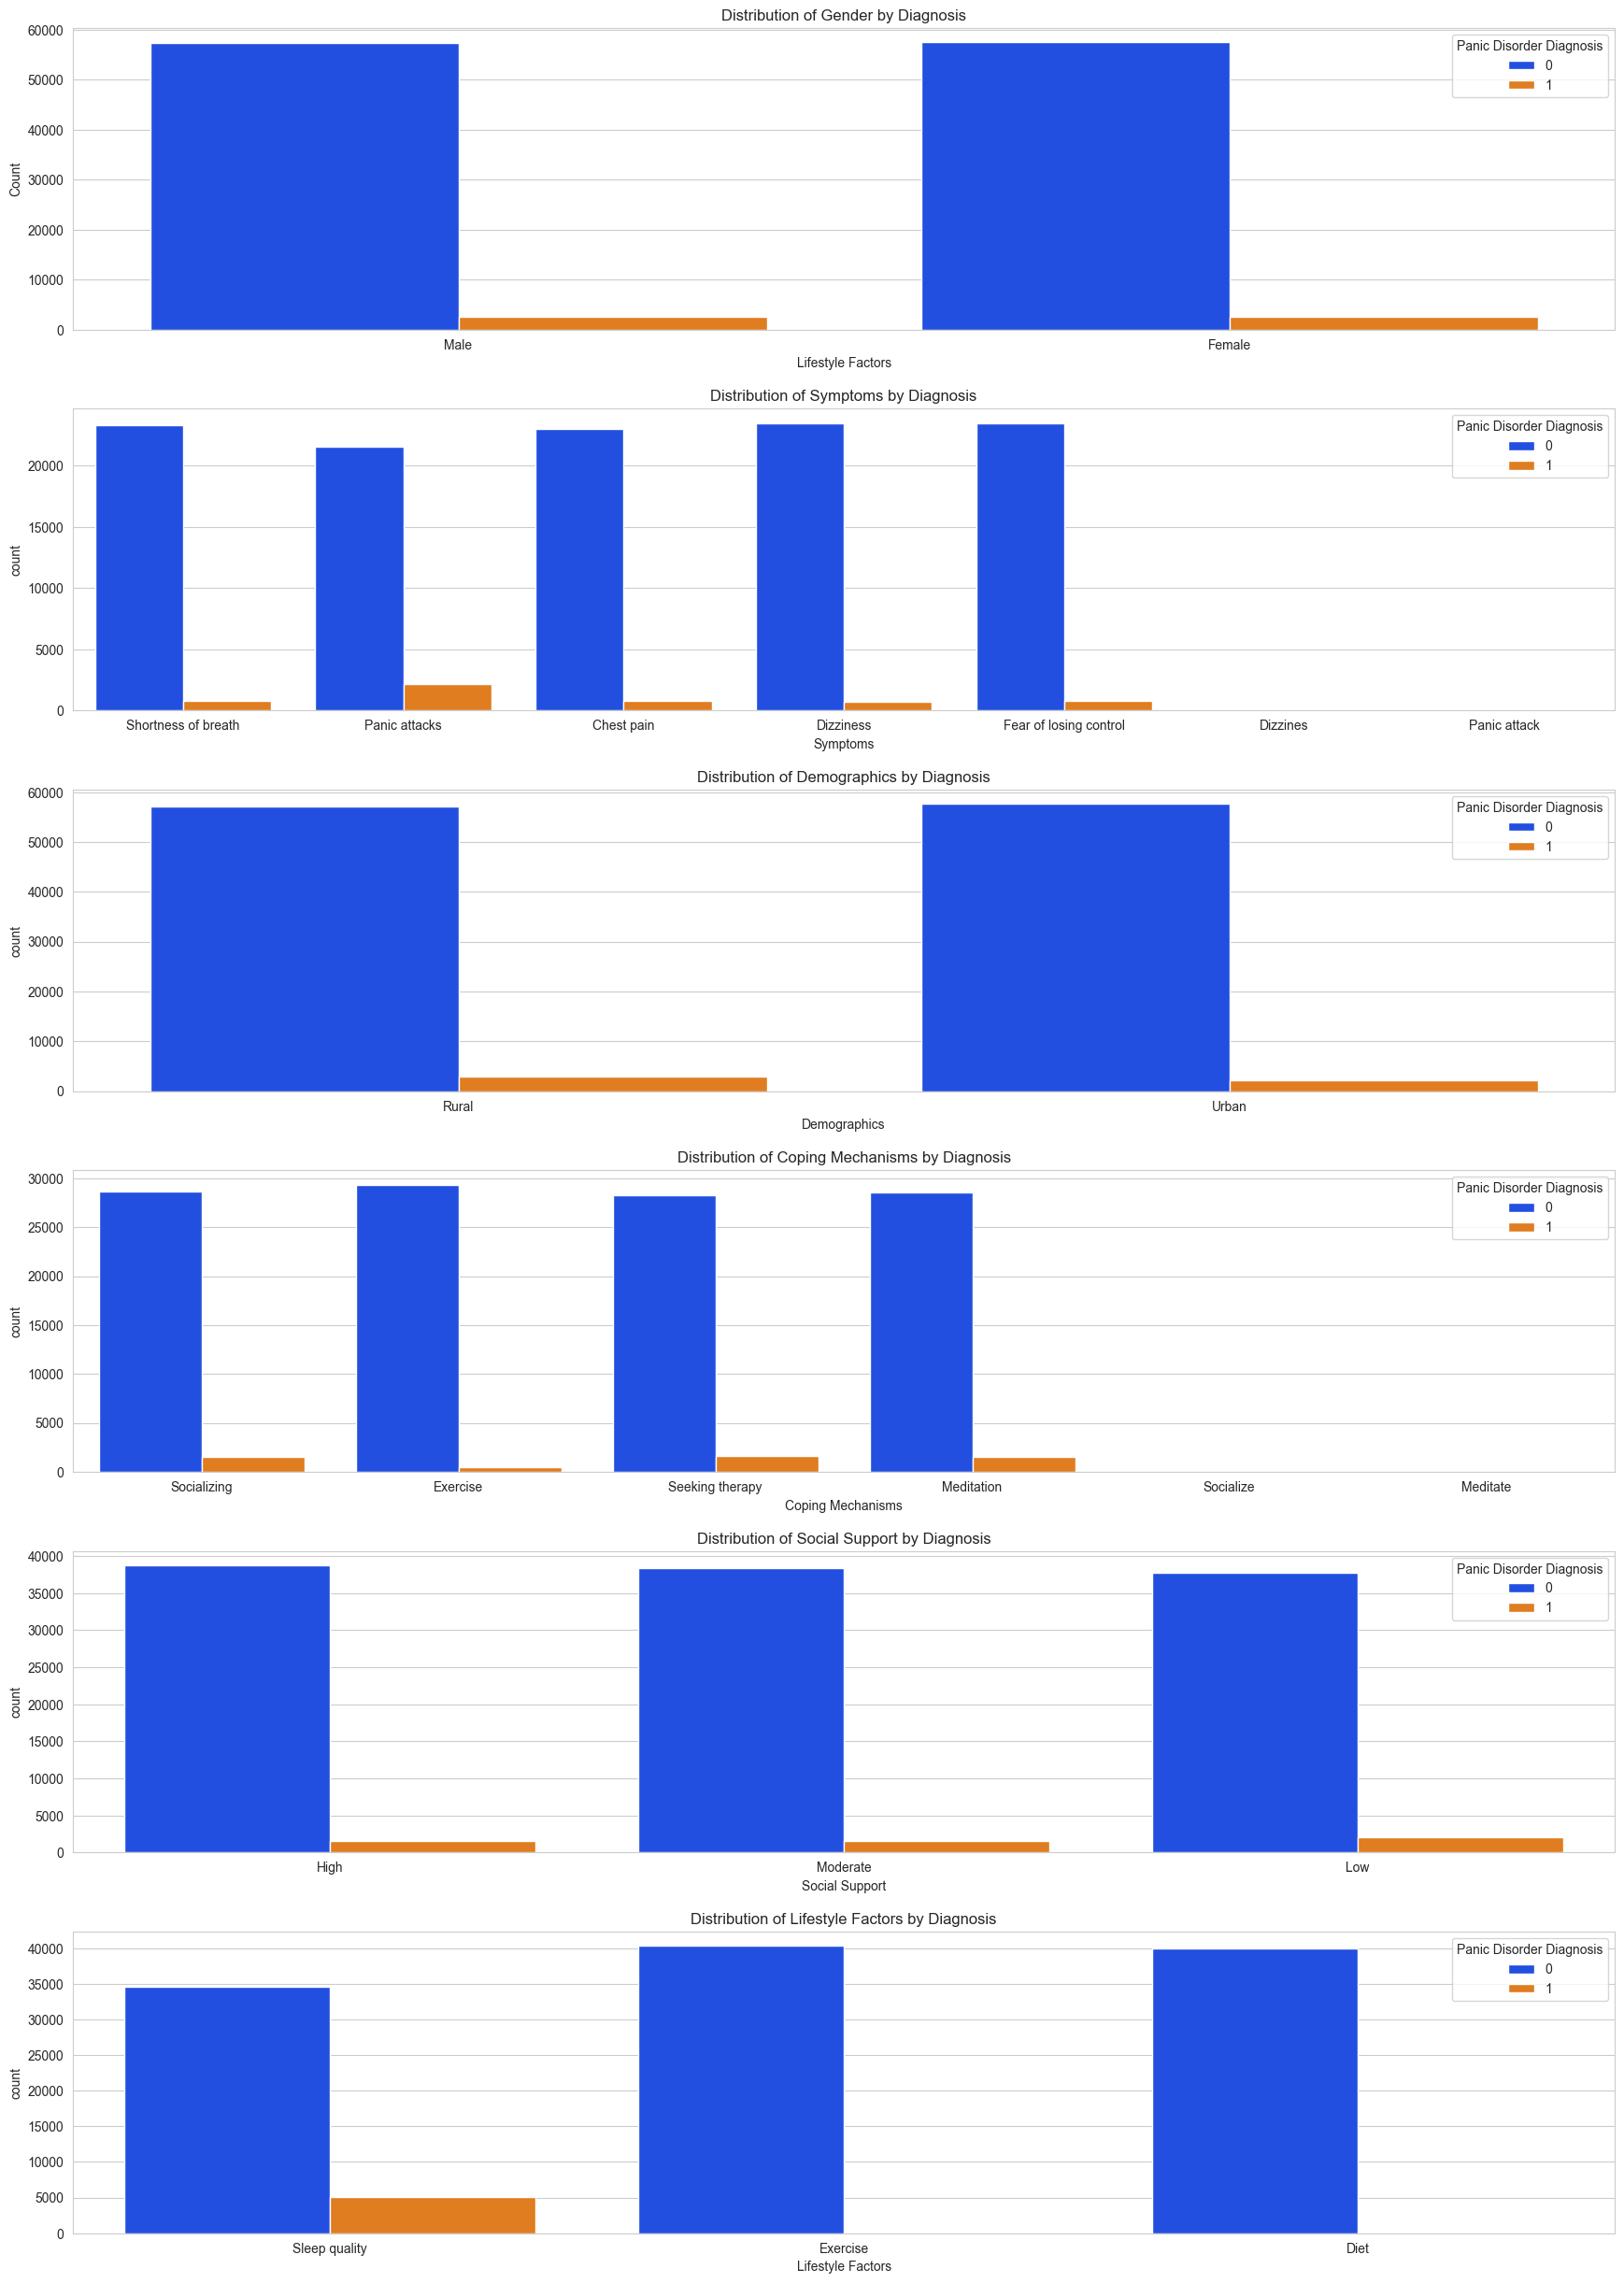

In [9]:
sns.set_style('whitegrid')

categorical_vars = [panic.columns[2], panic.columns[6], panic.columns[9],panic.columns[13],panic.columns[14], panic.columns[15]]
#categorical_vars

plot, axes = plt.subplots(ncols=1, nrows=len(categorical_vars), figsize = (18,25))
plot.tight_layout(pad=4.0)

for index, variable in enumerate(categorical_vars):
    sns.countplot(x=categorical_vars[index],data= panic, hue='Panic Disorder Diagnosis', palette='bright',ax= axes[index])
    axes[index].set_title(f'Distribution of {categorical_vars[index]} by Diagnosis')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel(categorical_vars[index])

plt.show()

### (1.5) Identify class imbalance in the target variable (Panic Disorder Diagnosis)

In [10]:
#pandas series containing the diagnosis [0, 1] with counts of how many times they occured
classes = panic['Panic Disorder Diagnosis'].value_counts().sort_index()

#Getting the sum so that we can find percentage distribution
total = classes.sum()

#Getting the ckasses as index for representation 
class_indexes = classes.index

#Calculating percentage distribution
percentages = []

for index in class_indexes:
    percentage = round((classes[index]/total)*100, 2)
    percentages.append(percentage)

#Creating a dataframe that shows us class distribution statistics
class_distribution = pd.DataFrame(data=classes)

class_distribution['Percentage Distribution'] = percentages


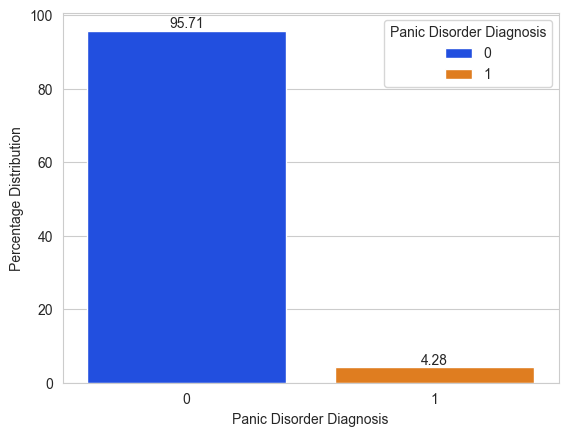

In [11]:
distirbution = sns.barplot(x= class_distribution.index,y='Percentage Distribution' ,data=class_distribution, hue='Panic Disorder Diagnosis', palette='bright')

for i in range(len(class_distribution.index)):
    distirbution.bar_label(distirbution.containers[i])

plt.show()

## Step 2: Data Cleaning & Transformation

### (2.1) Handle missing values (either drop or impute them appropriately like mean/mode)

In [12]:
missing_vars = ['Medical History', 'Psychiatric History', 'Substance Use']

#panic_null_dict
for var in missing_vars:
    missing = round((len(panic_null_dict[var])/120000)* 100,2) 
    print(f"For the {var} column, {missing}% entries are missing/non-null \n")

For the Medical History column, 25.19% entries are missing/non-null 

For the Psychiatric History column, 24.91% entries are missing/non-null 

For the Substance Use column, 33.4% entries are missing/non-null 



This is why it would be a bad option to drop the rows, rather imputation by mean (most frequent occurence) is the better option

In [13]:
for col in missing_vars:
    mode = panic[col].mode()[0]
    panic.fillna({col: mode}, inplace= True )

panic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            120000 non-null  int64 
 1   Age                       120000 non-null  int64 
 2   Gender                    120000 non-null  object
 3   Family History            120000 non-null  object
 4   Personal History          120000 non-null  object
 5   Current Stressors         120000 non-null  object
 6   Symptoms                  120000 non-null  object
 7   Severity                  120000 non-null  object
 8   Impact on Life            120000 non-null  object
 9   Demographics              120000 non-null  object
 10  Medical History           120000 non-null  object
 11  Psychiatric History       120000 non-null  object
 12  Substance Use             120000 non-null  object
 13  Coping Mechanisms         120000 non-null  object
 14  Soci

In [14]:
print("Class distribution before droping dupes: \n")
class_distribution

Class distribution before droping dupes: 



,count,Percentage Distribution
Panic Disorder Diagnosis,,
0,114858,95.71
1,5142,4.28


In [15]:
panic_cleaned = panic.drop_duplicates(subset=panic.columns.difference(['Panic Disorder Diagnosis']))

In [16]:
#pandas series containing the diagnosis [0, 1] with counts of how many times they occured for cleaned panic data set
classes = panic_cleaned['Panic Disorder Diagnosis'].value_counts().sort_index()
total = classes.sum()
class_indexes = classes.index
percentages = []

for index in class_indexes:
    percentage = round((classes[index]/total)*100, 2)
    percentages.append(percentage)

#Creating a dataframe that shows us class distribution statistics
class_distribution_cleaned = pd.DataFrame(data=classes)
class_distribution_cleaned['Percentage Distribution'] = percentages
class_distribution_cleaned


,count,Percentage Distribution
Panic Disorder Diagnosis,,
0,96087,95.71
1,4312,4.29


As there was no significant change in the distribution of the class variables, we now have a cleaned data set free of null values and dupes

### (2.3) Convert categorical columns into consistent format (fix typos, lowercase, remove extra spaces)

In [17]:
cat_cols = panic_cleaned.select_dtypes(include= object).columns
cat_cols

for col in cat_cols:

    #Converting to lower case
    panic_cleaned.loc[:, col] = (panic_cleaned[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True))

    print(f'The unique values for {col} columns are: \n')
    print(panic_cleaned[col].unique())
    print('*' + '-'*50 + '*' +'\n')


The unique values for Gender columns are: 

['male' 'female']
*--------------------------------------------------*

The unique values for Family History columns are: 

['no' 'yes']
*--------------------------------------------------*

The unique values for Personal History columns are: 

['yes' 'no']
*--------------------------------------------------*

The unique values for Current Stressors columns are: 

['moderate' 'high' 'low']
*--------------------------------------------------*

The unique values for Symptoms columns are: 

['shortness of breath' 'panic attacks' 'chest pain' 'dizziness'
 'fear of losing control' 'dizzines' 'panic attack']
*--------------------------------------------------*

The unique values for Severity columns are: 

['mild' 'moderate' 'severe']
*--------------------------------------------------*

The unique values for Impact on Life columns are: 

['mild' 'significant' 'moderate']
*--------------------------------------------------*

The unique values for D

In [18]:
#Cleaning up symptoms and medical history column

#df.method({col: value}, inplace=True)
panic_cleaned[cat_cols[4]].replace(to_replace=['dizzines','panic attacks'], value=['dizziness', 'panic attack'], inplace=True)
panic_cleaned[cat_cols[8]].replace(to_replace=['diabetic'], value=['diabetes'], inplace=True)

for col in (cat_cols):
    print(f'The unique values for {col} columns are: \n')
    print(panic_cleaned[col].unique())
    print('*' + '-'*50 + '*' +'\n')

The unique values for Gender columns are: 

['male' 'female']
*--------------------------------------------------*

The unique values for Family History columns are: 

['no' 'yes']
*--------------------------------------------------*

The unique values for Personal History columns are: 

['yes' 'no']
*--------------------------------------------------*

The unique values for Current Stressors columns are: 

['moderate' 'high' 'low']
*--------------------------------------------------*

The unique values for Symptoms columns are: 

['shortness of breath' 'panic attack' 'chest pain' 'dizziness'
 'fear of losing control']
*--------------------------------------------------*

The unique values for Severity columns are: 

['mild' 'moderate' 'severe']
*--------------------------------------------------*

The unique values for Impact on Life columns are: 

['mild' 'significant' 'moderate']
*--------------------------------------------------*

The unique values for Demographics columns are: 



C:\Users\ther3\AppData\Local\Temp\ipykernel_33268\295461590.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  panic_cleaned[cat_cols[4]].replace(to_replace=['dizzines','panic attacks'], value=['dizziness', 'panic attack'], inplace=True)
C:\Users\ther3\AppData\Local\Temp\ipykernel_33268\295461590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

### (2.4) Convert date-related fields (if any) into proper datetime format


In [19]:
panic_cleaned_date = panic_cleaned.select_dtypes(include= ['datetime', 'datetime64'])

if ( not panic_cleaned_date.empty):
    print('There is at least one datetime column:')
    print(list(panic_cleaned_date.columns))
else:
    print('There no date-related fields in this dataset')

There no date-related fields in this dataset


### (2.5) Handle outliers in numerical columns (Age, Severity, etc.). Visualize distributions first (e.g., boxplots or histograms) and possibly remove or cap/floor extreme values.

In [20]:
numericals= panic_cleaned.select_dtypes(exclude='object')
numerical_cols = numericals.columns
print((numerical_cols))

Index(['Participant ID', 'Age', 'Panic Disorder Diagnosis'], dtype='object')


In [21]:
#Creating a five-point summary of the age column
ages = panic_cleaned[numerical_cols[1]].sort_values(ascending=True)

q1 = np.percentile(ages, 25)
q3 = np.percentile(ages, 75)

inter_quartile_range = q3-q1

lower = q1 - (1.5*inter_quartile_range)
upper = q3 + (1.5*inter_quartile_range)

print(f"The q1 value is: {q1}")
print(f"The median value is: {ages.mode()}")
print(f"The q3 value is: {q3}")

print(f"The lower bound value is: {lower}")
print(f"The upper bound value is: {upper}")

#Listing all outliers
outliers = []
for age in ages:
    if(age< lower or age>upper):
        outliers.append(int(age))

#print('The outliers are: {}'.format(outliers))

The q1 value is: 29.0
The median value is: 0    54
Name: Age, dtype: int64
The q3 value is: 54.0
The lower bound value is: -8.5
The upper bound value is: 91.5


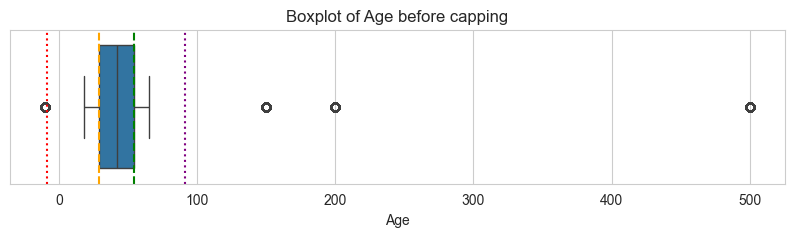

In [22]:
# Visualizing boxplots to show distribution of outliers
plt.figure(figsize=(10,2))
sns.boxplot(x= panic_cleaned['Age'])
plt.title('Boxplot of Age before capping')

plt.axvline(q1, color='orange', linestyle='--', label=f'Q1 = {q1:.1f}')
plt.axvline(q3, color='green', linestyle='--', label=f'Q3 = {q3:.1f}')

plt.axvline(lower, color='red', linestyle=':', label=f'Lower whisker = {lower:.1f}')
plt.axvline(upper, color='purple', linestyle=':', label=f'Upper whisker = {upper:.1f}')

In [23]:
#Cleaning the age column to remove all extreme outliers by using lower and upper bounds as clipping
min_age_actual = panic_cleaned['Age'][(panic_cleaned['Age'] > 0) & (panic_cleaned['Age'] <= 18) ]
print(f'The actual possible minimum age is : {min_age_actual[37]} \n')

panic_cleaned['Age'] = np.clip(panic_cleaned['Age'], a_min=min_age_actual[37], a_max=round(upper))


The actual possible minimum age is : 18 



C:\Users\ther3\AppData\Local\Temp\ipykernel_33268\708080190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panic_cleaned['Age'] = np.clip(panic_cleaned['Age'], a_min=min_age_actual[37], a_max=round(upper))


The q1 value is: 29.0
The median value is: 0    18
Name: Age, dtype: int64
The q3 value is: 54.0
The lower bound value is: -8.5
The upper bound value is: 91.5


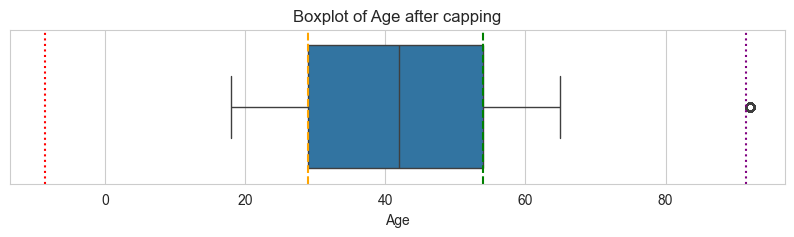

In [24]:
#Creating a five-point summary of the age column after clipping and generating a boxplot
ages = panic_cleaned[numerical_cols[1]].sort_values(ascending=True)

q1 = np.percentile(ages, 25)
q3 = np.percentile(ages, 75)

inter_quartile_range = q3-q1

lower = q1 - (1.5*inter_quartile_range)
upper = q3 + (1.5*inter_quartile_range)

print(f"The q1 value is: {q1}")
print(f"The median value is: {ages.mode()}")
print(f"The q3 value is: {q3}")

print(f"The lower bound value is: {lower}")
print(f"The upper bound value is: {upper}")

# Visualizing boxplots to show distribution of outliers
plt.figure(figsize=(10,2))
sns.boxplot(x= panic_cleaned['Age'])
plt.title('Boxplot of Age after capping')

plt.axvline(q1, color='orange', linestyle='--', label=f'Q1 = {q1:.1f}')
plt.axvline(q3, color='green', linestyle='--', label=f'Q3 = {q3:.1f}')

plt.axvline(lower, color='red', linestyle=':', label=f'Lower whisker = {lower:.1f}')
plt.axvline(upper, color='purple', linestyle=':', label=f'Upper whisker = {upper:.1f}')

In [25]:
#Copied value for unbalanced but cleaned dataframe
panic_cleaned_unbalanced = panic_cleaned.copy()

## Step 3: Handling Class Imbalance

### (3.1) Analyze the imbalance ratio in Panic Disorder Diagnosis

In [26]:
print('This is the class distribution before SMOTE: ')
class_distribution_cleaned

This is the class distribution before SMOTE: 


,count,Percentage Distribution
Panic Disorder Diagnosis,,
0,96087,95.71
1,4312,4.29


### (3.2) Apply at least two class imbalance handling techniques

#### (3.2.1) Oversampling using SMOTE (Synthetic Minority Oversampling Technique)

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [28]:

X= panic_cleaned.drop('Panic Disorder Diagnosis',axis=1)
#y= panic_cleaned['Panic Disorder Diagnosis']
X_labelled = X.copy()

X_labelled_categorical = X_labelled.select_dtypes(include='object')

for column in X_labelled_categorical.columns:
    lenc= LabelEncoder()
    X_labelled[column]= lenc.fit_transform(X_labelled[column].astype(str))



In [29]:
smote = SMOTE(random_state=45)

y= panic_cleaned['Panic Disorder Diagnosis']

resampled_X, resampled_y = smote.fit_resample(X_labelled, y)

panic_smote = pd.DataFrame(data= resampled_X)
panic_smote['Panic Disorder Diagnosis']= resampled_y

In [30]:
classes_smote = panic_smote['Panic Disorder Diagnosis'].value_counts().sort_index()
total = classes_smote.sum()
class_indexes = classes_smote.index
percentages = []

for index in class_indexes:
    percentage = round((classes_smote[index]/total)*100, 2)
    percentages.append(percentage)

#Creating a dataframe that shows us class distribution statistics
class_distribution_smote = pd.DataFrame(data=classes_smote)
class_distribution_smote['Percentage Distribution'] = percentages
print('The class distribution after SMOTE is: \n')
class_distribution_smote

The class distribution after SMOTE is: 



,count,Percentage Distribution
Panic Disorder Diagnosis,,
0,96087,50.0
1,96087,50.0


#### (3.2.2) Random undersampling of the majority class

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rusampler = RandomUnderSampler(random_state= 40)

X_rus, y_rus = rusampler.fit_resample(X_labelled, y)

panic_rus = pd.DataFrame(data= X_rus)
panic_rus['Panic Disorder Diagnosis']= y_rus

In [33]:
classes_rus = panic_rus['Panic Disorder Diagnosis'].value_counts().sort_index()
total = classes_rus.sum()
class_indexes = classes_rus.index
percentages_rus = []

for index in class_indexes:
    percentage = round((classes_rus[index]/total)*100, 2)
    percentages_rus.append(percentage)

#Creating a dataframe that shows us class distribution statistics
class_distribution_rus = pd.DataFrame(data=classes_smote)
class_distribution_rus['Percentage Distribution'] = percentages_rus
print('The class distribution after random undersampling of majority class is: \n')
class_distribution_rus

The class distribution after random undersampling of majority class is: 



,count,Percentage Distribution
Panic Disorder Diagnosis,,
0,96087,50.0
1,96087,50.0


## Step 4: Feature Engineering

### 4.1 Feature Engineering on Structured Data  


#### (4.1.1) Encode categorical variables using one-hot encoding or label encoding

In [34]:
panic_cleaned_non_int = panic_cleaned.select_dtypes(exclude='int64')
non_int_columns = panic_cleaned_non_int.columns
non_int_columns

Index(['Gender', 'Family History', 'Personal History', 'Current Stressors',
       'Symptoms', 'Severity', 'Impact on Life', 'Demographics',
       'Medical History', 'Psychiatric History', 'Substance Use',
       'Coping Mechanisms', 'Social Support', 'Lifestyle Factors'],
      dtype='object')

Label encoding for ordinal feaures : Severity, Impact on Life, Social Support

In [35]:
#For the ordinal variable values, we can find the unique values first
print(f"Unique values of Severity column are: {panic_cleaned_non_int['Severity'].unique()} \n")
print(f"Unique values of Impact of life column are: {panic_cleaned_non_int['Impact on Life'].unique()} \n")
print(f"Unique values of Social Support column are: {panic_cleaned_non_int['Social Support'].unique()} \n")

Unique values of Severity column are: ['mild' 'moderate' 'severe'] 

Unique values of Impact of life column are: ['mild' 'significant' 'moderate'] 

Unique values of Social Support column are: ['high' 'moderate' 'low'] 



In [36]:
from sklearn.preprocessing import OrdinalEncoder as oe

In [37]:
ordinal_cols = ['Severity', 'Impact on Life','Social Support' ]
ordinal_ordered=[['mild', 'moderate', 'severe'], ['mild', 'moderate', 'significant'], ['low' ,'moderate' ,'high']]

#Initialize a encoder
encoder = oe(categories=ordinal_ordered)

#Fitting values in specified order into the ordinal value columns
panic_cleaned[ordinal_cols] = encoder.fit_transform(panic_cleaned[ordinal_cols])


C:\Users\ther3\AppData\Local\Temp\ipykernel_33268\3981579715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panic_cleaned[ordinal_cols] = encoder.fit_transform(panic_cleaned[ordinal_cols])


#### For unbalanced dataframe

In [38]:
#Fitting values in specified order into the ordinal value columns
panic_cleaned_unbalanced[ordinal_cols] = encoder.fit_transform(panic_cleaned_unbalanced[ordinal_cols])


In [39]:
panic_cleaned.head(5)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,male,no,yes,moderate,shortness of breath,0.0,0.0,rural,diabetes,bipolar disorder,alcohol,socializing,2.0,sleep quality,0
1,2,51,male,no,no,high,panic attack,0.0,0.0,urban,asthma,anxiety disorder,drugs,exercise,2.0,sleep quality,0
2,3,32,female,yes,no,high,panic attack,0.0,2.0,urban,diabetes,depressive disorder,alcohol,seeking therapy,1.0,exercise,0
3,4,64,female,no,no,moderate,chest pain,1.0,1.0,rural,diabetes,anxiety disorder,alcohol,meditation,2.0,exercise,0
4,5,31,male,yes,no,moderate,panic attack,0.0,1.0,rural,asthma,anxiety disorder,drugs,seeking therapy,0.0,sleep quality,0


One-hot encoding for remaining nominal features


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
#Defining nominal columns 
nominal_cols = list(filter(lambda column: column not in ordinal_cols ,non_int_columns))
#nominal_cols

ohe = OneHotEncoder(sparse_output=False)

#Encoding only the nominal columns
ohe_encoded_nominal_cols = ohe.fit_transform(panic_cleaned[nominal_cols])

#Creating df of ohe nominal columns
ohencoded_df = pd.DataFrame(data=ohe_encoded_nominal_cols, columns= ohe.get_feature_names_out(nominal_cols), index=panic_cleaned.index)

#Drop original columns and concate the new one hot encoded values
panic_cleaned=panic_cleaned.drop(columns=nominal_cols)
panic_cleaned = pd.concat([panic_cleaned, ohencoded_df], axis=1)


#### For unbalanced dataframe!!!

In [42]:
#Encoding only the ub nominal columns
ohe_encoded_nominal_cols_ub = ohe.fit_transform(panic_cleaned_unbalanced[nominal_cols])

#Creating df of ohe ub nominal columns
ohencoded_df_ub = pd.DataFrame(data=ohe_encoded_nominal_cols_ub , columns= ohe.get_feature_names_out(nominal_cols), index=panic_cleaned_unbalanced.index)

#Drop original columns and concate the new one hot encoded values on ub dat
panic_cleaned_unbalanced =panic_cleaned_unbalanced.drop(columns=nominal_cols)
panic_cleaned_unbalanced = pd.concat([panic_cleaned_unbalanced, ohencoded_df_ub], axis=1)

In [43]:
panic_cleaned.head(5)

,Participant ID,Age,Severity,Impact on Life,Social Support,Panic Disorder Diagnosis,Gender_female,Gender_male,Family History_no,Family History_yes,...,Substance Use_drugs,Coping Mechanisms_exercise,Coping Mechanisms_meditate,Coping Mechanisms_meditation,Coping Mechanisms_seeking therapy,Coping Mechanisms_socialize,Coping Mechanisms_socializing,Lifestyle Factors_diet,Lifestyle Factors_exercise,Lifestyle Factors_sleep quality
0,1,38,0.0,0.0,2.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,51,0.0,0.0,2.0,0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,32,0.0,2.0,1.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,64,1.0,1.0,2.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,31,0.0,1.0,0.0,0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### (4.1.2) Scale numerical features (Age, Severity Score, etc.) using techniques like min-max, z-score, etc

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()
panic_cleaned['Age_scaled'] = scaler.fit_transform(panic_cleaned[['Age']]).round(1)

#### For unbalanced data

In [46]:
panic_cleaned_unbalanced['Age_scaled'] = scaler.fit_transform(panic_cleaned_unbalanced[['Age']]).round(1)

In [47]:
panic_cleaned.head()

,Participant ID,Age,Severity,Impact on Life,Social Support,Panic Disorder Diagnosis,Gender_female,Gender_male,Family History_no,Family History_yes,...,Coping Mechanisms_exercise,Coping Mechanisms_meditate,Coping Mechanisms_meditation,Coping Mechanisms_seeking therapy,Coping Mechanisms_socialize,Coping Mechanisms_socializing,Lifestyle Factors_diet,Lifestyle Factors_exercise,Lifestyle Factors_sleep quality,Age_scaled
0,1,38,0.0,0.0,2.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
1,2,51,0.0,0.0,2.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4
2,3,32,0.0,2.0,1.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2
3,4,64,1.0,1.0,2.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6
4,5,31,0.0,1.0,0.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2


In [48]:
panic_cleaned_unbalanced.head()

,Participant ID,Age,Severity,Impact on Life,Social Support,Panic Disorder Diagnosis,Gender_female,Gender_male,Family History_no,Family History_yes,...,Coping Mechanisms_exercise,Coping Mechanisms_meditate,Coping Mechanisms_meditation,Coping Mechanisms_seeking therapy,Coping Mechanisms_socialize,Coping Mechanisms_socializing,Lifestyle Factors_diet,Lifestyle Factors_exercise,Lifestyle Factors_sleep quality,Age_scaled
0,1,38,0.0,0.0,2.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
1,2,51,0.0,0.0,2.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4
2,3,32,0.0,2.0,1.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2
3,4,64,1.0,1.0,2.0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6
4,5,31,0.0,1.0,0.0,0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2


In [49]:
features_to_drop = [
    'Participant ID',  'Age', 'Severity', 'Impact on Life','Social Support'
]

# Print columns before dropping for verification
print("Columns before dropping:")
print(panic_cleaned.columns.tolist())
# Drop these columns if they exist in the unbalanced dataset
panic_cleaned= panic_cleaned.drop(['Participant ID',  'Age', 'Severity', 'Impact on Life','Social Support'], axis=1)
print("Columns after dropping:")
print(panic_cleaned.columns.tolist())

# Print columns before dropping for verification
print("Columns before dropping UB:")
print(panic_cleaned_unbalanced.columns.tolist())
# Drop these columns if they exist in the unbalanced dataset
panic_cleaned_unbalanced= panic_cleaned_unbalanced.drop(['Participant ID',  'Age', 'Severity', 'Impact on Life','Social Support'], axis=1)
print("Columns after dropping UB:")
print(panic_cleaned_unbalanced.columns.tolist())

Columns before dropping:
['Participant ID', 'Age', 'Severity', 'Impact on Life', 'Social Support', 'Panic Disorder Diagnosis', 'Gender_female', 'Gender_male', 'Family History_no', 'Family History_yes', 'Personal History_no', 'Personal History_yes', 'Current Stressors_high', 'Current Stressors_low', 'Current Stressors_moderate', 'Symptoms_chest pain', 'Symptoms_dizziness', 'Symptoms_fear of losing control', 'Symptoms_panic attack', 'Symptoms_shortness of breath', 'Demographics_rural', 'Demographics_urban', 'Medical History_asthma', 'Medical History_diabetes', 'Medical History_heart disease', 'Psychiatric History_anxiety disorder', 'Psychiatric History_bipolar disorder', 'Psychiatric History_depressive disorder', 'Substance Use_alcohol', 'Substance Use_drugs', 'Coping Mechanisms_exercise', 'Coping Mechanisms_meditate', 'Coping Mechanisms_meditation', 'Coping Mechanisms_seeking therapy', 'Coping Mechanisms_socialize', 'Coping Mechanisms_socializing', 'Lifestyle Factors_diet', 'Lifestyle F

## Step 5: Feature Importance Analysis

### 5.1 Correlation Analysis

#### (5.1.1) Compute the correlation matrix to see relationships between numerical features. Plot a heatmap of the correlation matrix.

Although the only the true numerical column is the Age_scaled column, for correlation matrix and the heatmap generation I will be using the encoded ordinal columns as well for greater insight
 

In [50]:
panic_cleaned.columns

Index(['Panic Disorder Diagnosis', 'Gender_female', 'Gender_male',
       'Family History_no', 'Family History_yes', 'Personal History_no',
       'Personal History_yes', 'Current Stressors_high',
       'Current Stressors_low', 'Current Stressors_moderate',
       'Symptoms_chest pain', 'Symptoms_dizziness',
       'Symptoms_fear of losing control', 'Symptoms_panic attack',
       'Symptoms_shortness of breath', 'Demographics_rural',
       'Demographics_urban', 'Medical History_asthma',
       'Medical History_diabetes', 'Medical History_heart disease',
       'Psychiatric History_anxiety disorder',
       'Psychiatric History_bipolar disorder',
       'Psychiatric History_depressive disorder', 'Substance Use_alcohol',
       'Substance Use_drugs', 'Coping Mechanisms_exercise',
       'Coping Mechanisms_meditate', 'Coping Mechanisms_meditation',
       'Coping Mechanisms_seeking therapy', 'Coping Mechanisms_socialize',
       'Coping Mechanisms_socializing', 'Lifestyle Factors_diet',

### 5.2 Feature Importance from Models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report

#### (5.2.1) Train a Random Forest model and extract feature importance scores.

In [52]:
#Splitting the data into test/train split at 80/20 ratio
X= panic_cleaned.drop('Panic Disorder Diagnosis', axis=1)
y= panic_cleaned['Panic Disorder Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [53]:
rf = RandomForestClassifier(random_state=45)

rf.fit(X_train, y_train)

features = X.columns
features_importance_rf_model = rf.feature_importances_

In [54]:
#Creating a model with the features and their extracted importance 
features_importance_df = pd.DataFrame(data={'features': features, 'importance': features_importance_rf_model}).sort_values(ascending=False, by ='importance')

#Top 10 most important features displayed
features_importance_df.head(10)

,features,importance
33,Age_scaled,0.197549
32,Lifestyle Factors_sleep quality,0.098390
6,Current Stressors_high,0.055073
12,Symptoms_panic attack,0.050672
30,Lifestyle Factors_diet,0.038099
31,Lifestyle Factors_exercise,0.033795
8,Current Stressors_moderate,0.026022
24,Coping Mechanisms_exercise,0.025853
3,Family History_yes,0.025293
2,Family History_no,0.024550


#### (5.2.2) Train a Logistic Regression model and analyze coefficients


In [55]:
logreg = LogisticRegression(max_iter= 10000,random_state=45)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=45)

In [56]:
coeff = logreg.coef_[0]
absolute_coeff = np.abs(coeff)

logreg_coeff_df = pd.DataFrame(data={'features': features, 'coeffiecient value': coeff, 'Absolute Coeffiecient value': absolute_coeff}).sort_values(by= 'Absolute Coeffiecient value', ascending=False)


#### (5.2.3) Visualize feature importance using a bar chart


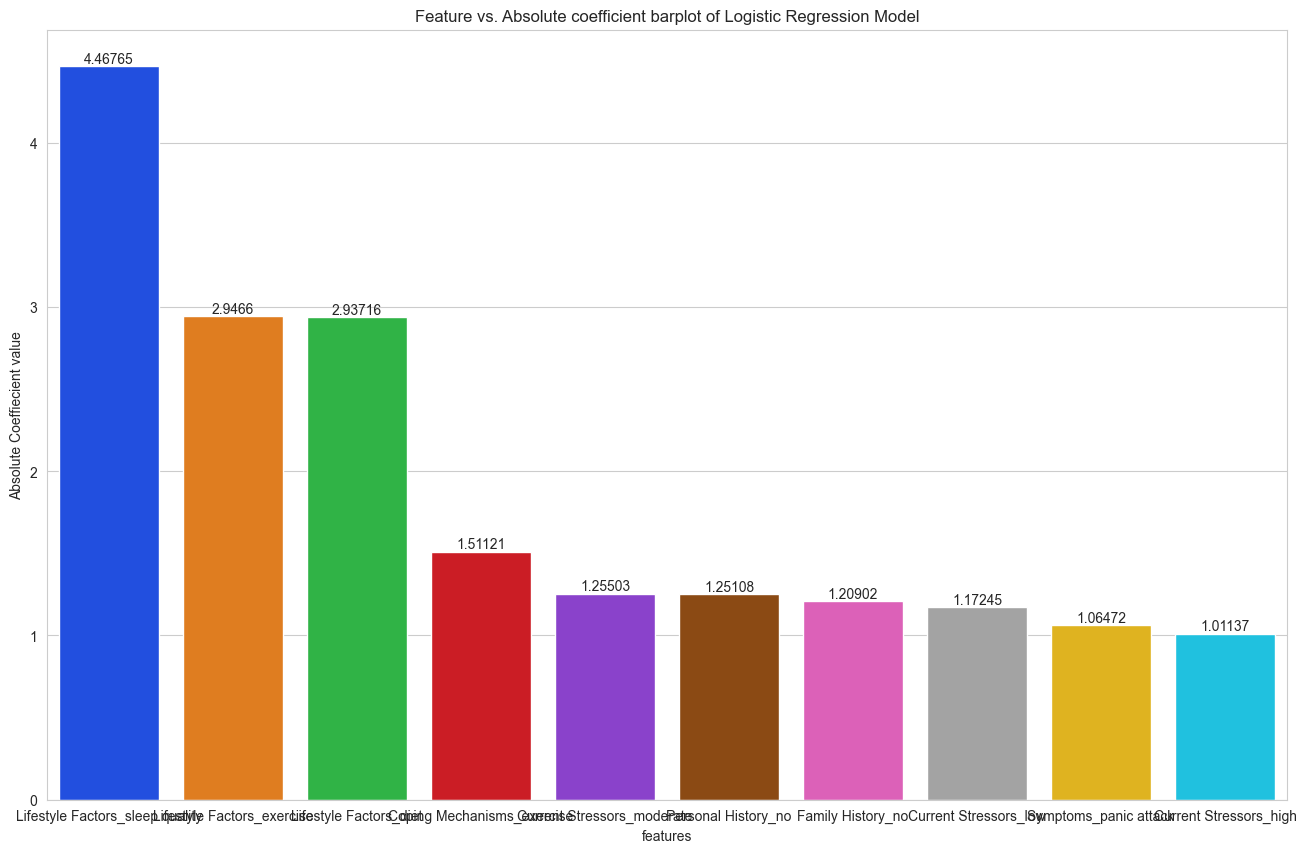

In [57]:
plt.figure(figsize=(16,10))
logreg_coeff_df_top10 = logreg_coeff_df.iloc[:10]
logreg_coeff_chart = sns.barplot(x= logreg_coeff_df_top10['features'],y=logreg_coeff_df_top10['Absolute Coeffiecient value'] ,data=logreg_coeff_df_top10, hue='features', palette='bright')

plt.title('Feature vs. Absolute coefficient barplot of Logistic Regression Model')

for i in range(len(logreg_coeff_df_top10)):
    logreg_coeff_chart.bar_label(logreg_coeff_chart.containers[i])

plt.show()

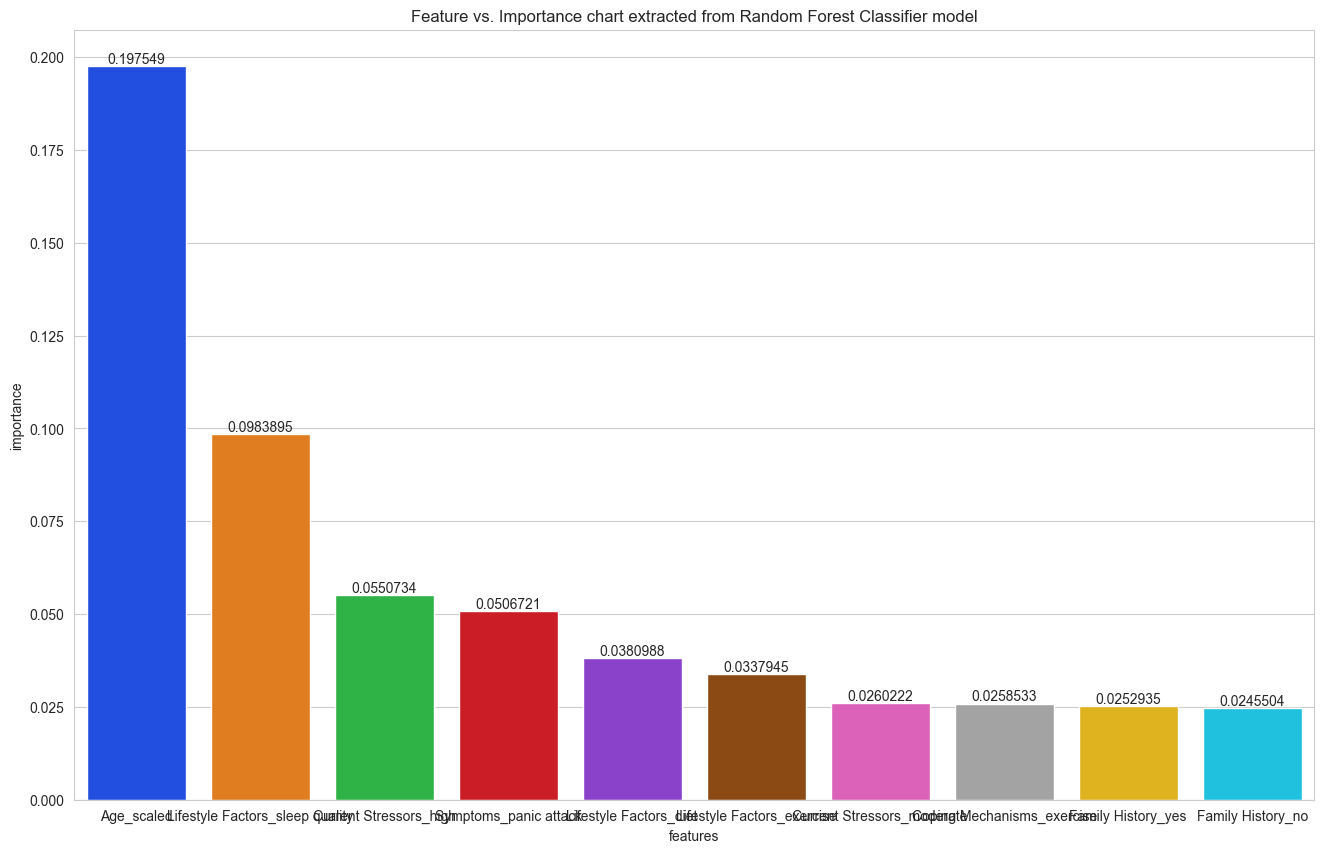

In [58]:
plt.figure(figsize=(16,10))
features_important_top_10 = features_importance_df.iloc[:10]
feature_importance_chart = sns.barplot(x= features_important_top_10['features'],y=features_important_top_10['importance'] ,data=features_important_top_10, hue='features', palette='bright')
plt.title('Feature vs. Importance chart extracted from Random Forest Classifier model')

for i in range(len(features_important_top_10)):
    feature_importance_chart.bar_label(feature_importance_chart.containers[i])

plt.show()

## Step 6: Model Training & Evaluation

### 6.1 Model Selection & Training

#### (6.1.1) Split the dataset into training and test sets (70-30 split)

##### FOR BALANCED

In [59]:
#Splitting the data into test/train split at 70/30 ratio
X= panic_cleaned.drop('Panic Disorder Diagnosis', axis=1)
y= panic_cleaned['Panic Disorder Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

##### FOR UNBALANCED

In [60]:
#Splitting the data into test/train split at 70/30 ratio
X_ub= panic_cleaned_unbalanced.drop('Panic Disorder Diagnosis', axis=1)
y_ub= panic_cleaned_unbalanced['Panic Disorder Diagnosis']

X_train_ub, X_test_ub, y_train_ub, y_test_ub = train_test_split(X_ub, y_ub, test_size=0.3, random_state=45)

#### (6.1.2) Train at least three different classification models

##### Training on on balanced data

###### Training logistic regression model to predict value of Panic Order Diagnosis on balanced data


In [61]:
logreg= LogisticRegression(max_iter= 10000, random_state=45)
logreg_model = logreg.fit(X_train, y_train)

y_predict = logreg_model.predict(X_test)
y_probability = logreg.predict_proba(X_test)[:, 1]

###### Training a Random Forest classifier model

In [62]:
rf = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model = rf.fit(X_train, y_train)

y_predict_rf = rf_model.predict(X_test)
y_probability_rf = rf.predict_proba(X_test)[:, 1]

###### Training a Support Vector Machine model

In [63]:
svm = SVC(probability=True, random_state=45)
svm_model = svm.fit(X_train, y_train)

y_predict_svm = svm.predict(X_test)
y_probability_svm = svm.predict_proba(X_test)[:, 1]

##### Training UNBALANCED data


In [64]:

logreg_ub = LogisticRegression(max_iter=10000, random_state=45)
logreg_ub.fit(X_train_ub, y_train_ub)

y_pred_logreg_ub = logreg_ub.predict(X_test_ub)
y_proba_logreg_ub = logreg_ub.predict_proba(X_test_ub)[:, 1]

In [65]:

rf_ub = RandomForestClassifier(n_estimators=100, random_state=45)
rf_ub.fit(X_train_ub, y_train_ub)

y_pred_rf_ub = rf_ub.predict(X_test_ub)
y_proba_rf_ub = rf_ub.predict_proba(X_test_ub)[:, 1]

In [66]:

svm_ub = SVC( probability=True,random_state=45)
svm_ub.fit(X_train_ub, y_train_ub)

y_pred_svm_ub = svm_ub.predict(X_test_ub)
y_proba_svm_ub = svm_ub.predict_proba(X_test_ub)[:, 1]

#### (6.1.3) Use cross-validation to tune hyperparameters


##### For Linear regression model

In [67]:
"""from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

logreg = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='f1', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_logreg.best_params_)
print("Best Logistic Regression CV F1:", grid_logreg.best_score_)"""

'from sklearn.model_selection import GridSearchCV\n\nparam_grid_logreg = {\n    \'C\': [0.01, 0.1, 1, 10],\n    \'penalty\': [\'l2\'],\n    \'solver\': [\'lbfgs\', \'liblinear\']\n}\n\nlogreg = LogisticRegression(class_weight=\'balanced\', max_iter=10000, random_state=42)\ngrid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring=\'f1\', n_jobs=-1)\ngrid_logreg.fit(X_train, y_train)\n\nprint("Best Logistic Regression params:", grid_logreg.best_params_)\nprint("Best Logistic Regression CV F1:", grid_logreg.best_score_)'

##### For random forest classifier

In [68]:
"""param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest params:", grid_rf.best_params_)
print("Best Random Forest CV F1:", grid_rf.best_score_)"""

'param_grid_rf = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2],\n    \'class_weight\': [\'balanced\']\n}\n\nrf = RandomForestClassifier(random_state=42)\ngrid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring=\'f1\', n_jobs=-1)\ngrid_rf.fit(X_train, y_train)\n\nprint("Best Random Forest params:", grid_rf.best_params_)\nprint("Best Random Forest CV F1:", grid_rf.best_score_)'

##### For SVM model

In [69]:
"""param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
print("Best SVM CV F1:", grid_svm.best_score_)"""

'param_grid_svm = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\'],\n    \'class_weight\': [\'balanced\']\n}\n\nsvm = SVC(probability=True, random_state=42)\ngrid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring=\'f1\', n_jobs=-1)\ngrid_svm.fit(X_train, y_train)\n\nprint("Best SVM params:", grid_svm.best_params_)\nprint("Best SVM CV F1:", grid_svm.best_score_)'

### 6.2 Model Evaluation & Comparison

#### (6.2.1) Compute evaluation metrics: Accuracy, Precision, Recall, F1-score, ROC Curve & AUC Score

##### FOR BALANCED DATA

In [70]:

accuracy_scores = [accuracy_score(y_test, y_predict), accuracy_score(y_test, y_predict_rf), accuracy_score(y_test, y_predict_svm)]
precision_scores = [precision_score(y_test, y_predict), precision_score(y_test, y_predict_rf), precision_score(y_test, y_predict_svm) ]
recall_scores = [recall_score(y_test, y_predict),recall_score(y_test, y_predict_rf), recall_score(y_test, y_predict_svm) ]
f1_scores = [f1_score(y_test, y_predict), f1_score(y_test, y_predict_rf), f1_score(y_test, y_predict_svm)]
roc_auc_scores = [roc_auc_score(y_test, y_probability), roc_auc_score(y_test, y_probability_rf), roc_auc_score(y_test, y_probability_svm) ]

model_names = ['Logistic Regression model', 'Random forest classifier model', 'Support Vector Machine Model']

classification_report_balanced_df = pd.DataFrame(data={ 
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores 
}, index= model_names)

classification_report_balanced_df


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression model,0.954947,0.492727,0.200890,0.285413,0.965031
Random forest classifier model,0.955013,0.497110,0.382506,0.432342,0.971912
Support Vector Machine Model,0.959728,0.571429,0.403262,0.472838,0.972516


##### FOR UNBALANCED


In [71]:
accuracy_scores_ub = [
    accuracy_score(y_test_ub, y_pred_logreg_ub),
    accuracy_score(y_test_ub, y_pred_rf_ub),
    accuracy_score(y_test_ub, y_pred_svm_ub)
]

precision_scores_ub = [
    precision_score(y_test_ub, y_pred_logreg_ub),
    precision_score(y_test_ub, y_pred_rf_ub),
    precision_score(y_test_ub, y_pred_svm_ub)
]

recall_scores_ub = [
    recall_score(y_test_ub, y_pred_logreg_ub),
    recall_score(y_test_ub, y_pred_rf_ub),
    recall_score(y_test_ub, y_pred_svm_ub)
]

f1_scores_ub = [
    f1_score(y_test_ub, y_pred_logreg_ub),
    f1_score(y_test_ub, y_pred_rf_ub),
    f1_score(y_test_ub, y_pred_svm_ub)
]

roc_auc_scores_ub = [
    roc_auc_score(y_test_ub, y_proba_logreg_ub),
    roc_auc_score(y_test_ub, y_proba_rf_ub),
    roc_auc_score(y_test_ub, y_proba_svm_ub)
]

model_names_ub = [
    "Logistic Regression (Unbalanced)",
    "Random Forest (Unbalanced)",
    "Support Vector Machine (Unbalanced)"
]

# Create the DataFrame
classification_report_UNbalanced_df = pd.DataFrame({
    'Accuracy': accuracy_scores_ub,
    'Precision': precision_scores_ub,
    'Recall': recall_scores_ub,
    'F1 Score': f1_scores_ub,
    'ROC AUC': roc_auc_scores_ub
}, index=model_names_ub)

classification_report_UNbalanced_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression (Unbalanced),0.954947,0.492727,0.200890,0.285413,0.965031
Random Forest (Unbalanced),0.955013,0.497110,0.382506,0.432342,0.971912
Support Vector Machine (Unbalanced),0.959728,0.571429,0.403262,0.472838,0.972516


#### (6.2.2) Compare all models before and after handling class imbalance

In [ ]:
comparison_df = pd.concat([classification_report_balanced_df,classification_report_UNbalanced_df], axis= 0)
comparison_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression model,0.954947,0.492727,0.200890,0.285413,0.965031
Random forest classifier model,0.955013,0.497110,0.382506,0.432342,0.971912
Support Vector Machine Model,0.959728,0.571429,0.403262,0.472838,0.972516
Logistic Regression (Unbalanced),0.954947,0.492727,0.200890,0.285413,0.965031
Random Forest (Unbalanced),0.955013,0.497110,0.382506,0.432342,0.971912
Support Vector Machine (Unbalanced),0.959728,0.571429,0.403262,0.472838,0.972516


#### (6.2.3) Visualize and compare results of different models using bar plots 

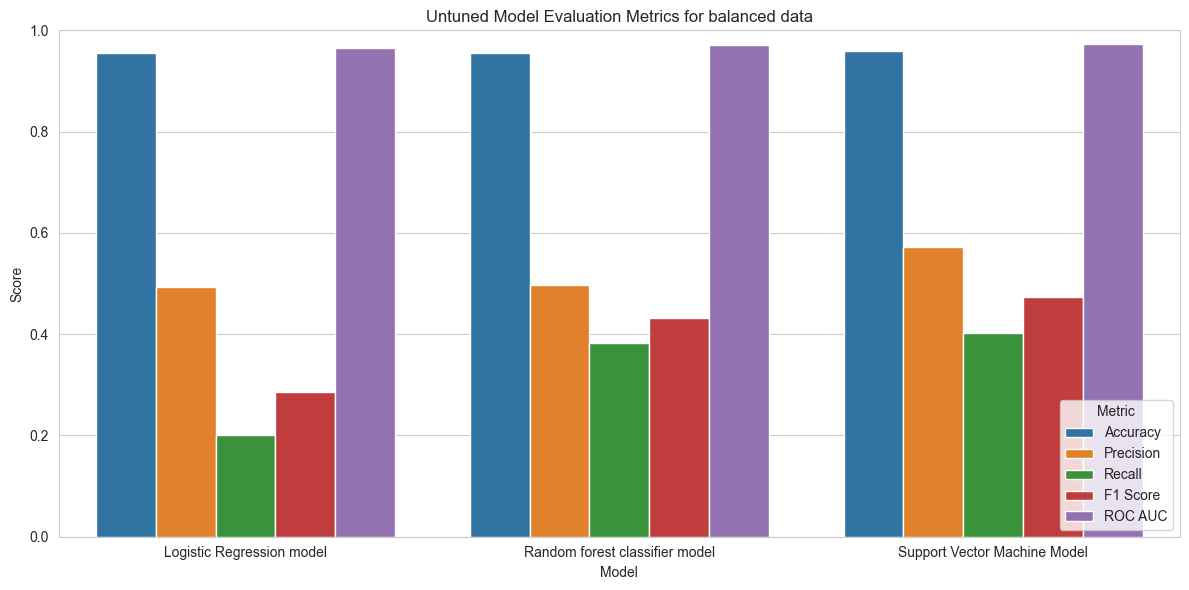

In [73]:

results_long = classification_report_balanced_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_long = results_long.rename(columns={'index': 'Model'})

plt.figure(figsize=(12, 6))
sns.barplot(data=results_long, x='Model', y='Score', hue='Metric')
plt.title('Untuned Model Evaluation Metrics for balanced data')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()

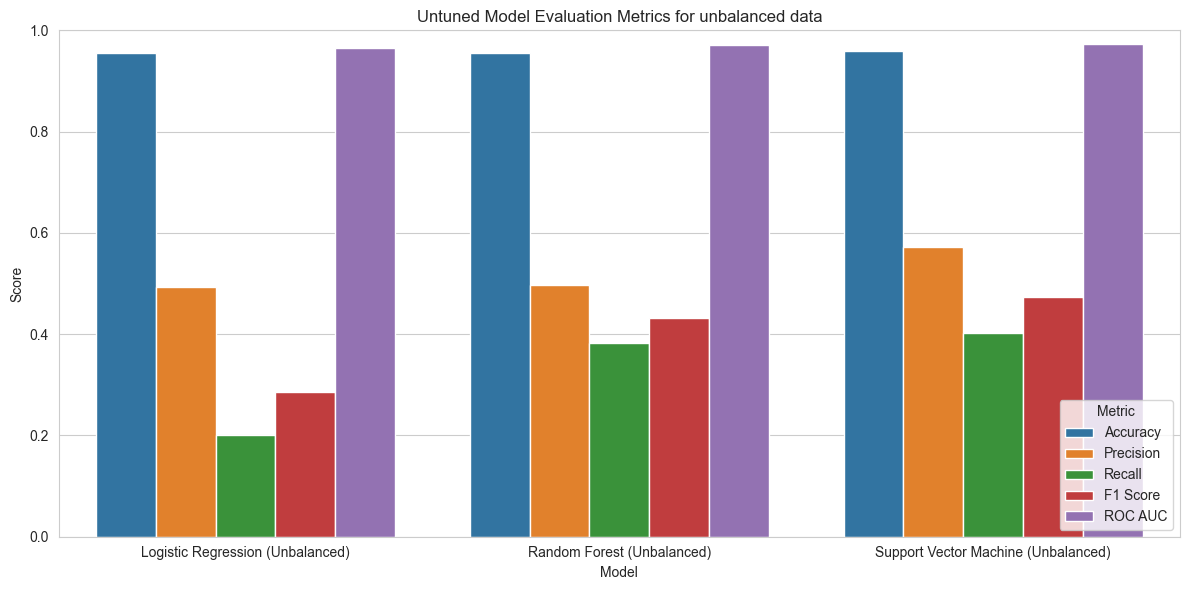

In [74]:
results_long = classification_report_UNbalanced_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_long = results_long.rename(columns={'index': 'Model'})

plt.figure(figsize=(12, 6))
sns.barplot(data=results_long, x='Model', y='Score', hue='Metric')
plt.title('Untuned Model Evaluation Metrics for unbalanced data')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()

## Step 7: Ethical Considerations

### (7.1) Discuss bias and fairness in mental health predictions.

The inheritance and amplification of bias in AI models used for mental health predecitions is a real and serious issue. Due to underrepresentation of certain genders, ethnicities, or age groups in already collected training data, a model trained on the biased data will be inaccurate as it alienates a large population of people that have in fact shown high rates of mental health issues. This can result in unequal access to care and more often misdiagnosis, both of which can prove to be fatal. In order to ensure that fairness is maintained, there has to be an active effort by researchers to collect more data from underrepresented classes and also acknowledge the bias that exists in legacy data. Education is the most key step when it comes to eliminating bias in data, the more people are aware of this phenomenon, the higher the chance that it is caught...

### (7.2) Explain potential ethical concerns when using AI for mental health assessments

Using AI for mental health assessment raises valid ethical concerns. As mental health data is highly sensitive, patient privacy and data security must be priority above all else. There is also a risk of overreliance on automated decisions, which may lack the nuance and empathy of human clinicians and also amplify biases as discussed in the previous question. Inaccurate predictions could lead to stigma or inappropriate treatment. Therefore, AI tools should be in supplement to and not replace, clinical judgment, and their use must be guided by ethical and fair use....